

# Proyecto: Aplicación del NPL


---


>**Autor:**


> Jose Miguel Barbosa

>**Entregado a:** Claudia Marcela Ospina  
>**Materia:** Procesamiento Natural de Lenguaje NRC-673  
>**Especialización:** Inteligencia Artificial  
>**Fecha:** 27/11/2023

---

*¡Gracias por revisar el proyecto!*


# **Análisis de sentimiento (Naive Bayes y TextBlob)**
___


En el vasto mundo de la información digital, la comprensión de las opiniones y sentimientos expresados por los usuarios se ha vuelto esencial, especialmente en áreas como la industria del entretenimiento, donde la retroalimentación del público puede influir significativamente en el éxito de una película. Este proyecto se propone llevar a cabo un exhaustivo análisis de sentimientos sobre un extenso conjunto de datos que abarca 50,000 comentarios de usuarios relacionados con diversas películas.

___


### <p style="background-color:Lime;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Tabla de Contenido </p>

___


#### 1. [Dataset IMDB: Preprocesamiento de datos](#PR)
* **1.1. Carga y visualización del dataset**  
* **1.2. Remover etiquetas html**  
* **1.3. Conversión a minúsculas**
* **1.4. Remover caracteres especiales**
* **1.5. Remover Stopwords**
* **1.6. Derivar palabras (Stemmer)**
* **1.7. Tabular espacios en blanco**
* **1.8. Guardar copia del corpus depurado**

#### 2. [TextBlob: Análisis de sentimientos](#TB)

#### 3. [Naive Bayes: ](#NV)


<a name='PR'></a>

## <p style="background-color:Lime;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> 1. Dataset IMDB: Preprocesamiento de datos </p>

* Disponible en: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews



> * El Dataset de IMDB cuenta con 50 000 reseñas de películas frecuentemente utilizado en PNL
> * Este es un conjunto de datos óptimo para la clasificación binaria de sentimientos
> * El dataset posee 25.000 registros etiquetados con polaridad positiva y 25.000 con polaridad negativa.
> * Para este caso utilizaremos 5000 registros.

# En la implementación de este código, se hace uso de diversas bibliotecas fundamentales para el análisis de datos y el procesamiento de texto. La combinación de Pandas, NumPy, y re (expresiones regulares) no solo proporciona una base sólida para la manipulación eficiente de datos, sino que también habilita operaciones específicas para la limpieza y transformación de texto.

In [45]:
import pandas as pd # Operación con Dataframes
import numpy as np # Cálculos numéricos
import re # Operación con expresiones regulares (unidades de texto)

### 1.1. Carga y visualización del Dataset

> * Cargaremos el Dataset desde archivo .CSV
> * Se toma  una muestra de 5000 registros de

In [46]:
# Se crea instancia para la lectura de los datos mediante .read de pandas
dataframe = pd.read_csv('/content/sample_data/IMDB_Dataset.csv', error_bad_lines=False)

# visualizar primeros registros del dataset mediante .head de pandas
dataframe.head()

<ipython-input-46-ced283e1de65>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataframe = pd.read_csv('/content/sample_data/IMDB_Dataset.csv', error_bad_lines=False)


review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

> * Se renombra las columnas para facilitar el trabajo

In [47]:
# Toma de muestra de 5000 registros
# Crear objeto de trabajo para tomar una muestra de 5000 registros (df)
df = dataframe.sample(n=5000)
df.head()
# Renombramos las columnas mediante .columns de pandas

nuevos_nombres = ['texto', 'sentimiento']

# Verifica que la longitud de nuevos_nombres sea igual a la cantidad de columnas en tu DataFrame
if len(nuevos_nombres) == len(df.columns):
    df.columns = nuevos_nombres
    print("Columnas renombradas con éxito.")
else:
    print("Error: La longitud de nuevos_nombres no coincide con la cantidad de columnas en el DataFrame.")

# visualizar últimos registros del dataset mediante .tail de pandas
df.tail()


Columnas renombradas con éxito.


texto sentimiento
32081  FULL OF SPOILERS.<br /><br />This is a pretty ...    positive
7868   This movie was a pleasant surprise because I d...    positive
31860  Even before this film it is clear to see that ...    negative
29151  When I saw this film the first time I was very...    positive
39082  I have to say I was pleasantly surprised by th...    positive

> * Explorando dimensión del dataset y el contenido de sus registros (reseñas)

In [48]:
# Exploremos la dimensión del dataset y una de sus reseñas

# Veamos la dimensión del dataset
print("Dimensión del dataset:", df.shape)

# mostraremos el registro almacenado en el índice definido de la columna "texto" (p.e. 2)
df['texto'][2]

Dimensión del dataset: (5000, 2)


'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

### 1.2. Remover etiquetas html

> * Mediante el módulo re de python se realizarán algunas operaciones con las expresiones regulares  que componen el dataset.

In [49]:
# Removeremos las etiquetas html que contenga la columna texto del dataset

# Definimos función para aplicar sobre archivo de texto
def remover_html(text):
    # se define instancia para implementar .compile de re (señalando caracteres a remover entre'')
    remover = re.compile('<.*?>')
    # se pide substituir (remover) etiquetas html
    return re.sub(remover,'',text)

# Una vez definida la función la aplicaremos a la columna "texto" (corpus)
df['texto'] = df['texto'].apply(remover_html)

# mostrar primeros registros del dataset mediante .head de pandas
df.head()

texto sentimiento
38090  ***Tip: Have It Read To You, Heres How***1) Co...    negative
24009  I saw this only because my 10-yr-old was bored...    negative
16875  How could they take such a beautifully animate...    negative
43402  All I can say after watching the DVDs of the f...    positive
12264  Of all the actresses in film today, Kristin Sc...    positive

### 1.3. Conversión a minúsculas

> * Se aplicará función al corpus para convertirlo en su totalidad a minúsculas

In [50]:
# Definiendo función para convertir el texto a minúsculas

# crear función minúsculas para aplicar a archivo de texto
def convertir_minusculas(text):
    # regresará como respuesta el texto en minúsculas
    return text.lower()

# Aplicar función a columna "texto" del dataset
df['texto'] = df['texto'].apply(convertir_minusculas)

# mostrar un número determinado de registros elegidos aleatoriamente mediante .sample de pandas
df.sample(7)

texto sentimiento
45556  as a young lass, beautiful joan woodbury (as r...    negative
34263  this film very succeed in the film festival in...    positive
22953  with the massive advertising this is getting o...    negative
24320  *soiler* it's fake! the whole thing is a fake!...    negative
45418  vampire cyborgs rule the world and use the blo...    negative
46587  "putney swope" is a unique, low low low budget...    positive
2364   one of my desires is to be a film-maker, and i...    positive

### 1.4. Remover caracteres especiales

> * Se aplicará función al corpus para remover caracteres no alfanuméricos

In [51]:
# Definiendo función para remover caracteres especiales del texto
# crear función remover_no_alfanumericos para aplicar a archivo de texto

# se define que la función escaneará el texto por cada registro (x) y si los caracteres son
# alfanuméricos los mantendrá, de lo contrario, serán removidos
def remover_no_alfanumericos(text):
    x = ''
    for i in text:
        if i.isalnum():
            x = x+i
        else:
            x = x + ' '
    return x

# Aplicar función a columna "texto" del dataset
df['texto'] = df['texto'].apply(remover_no_alfanumericos)

# mostrar primeros registros del dataset
df.head()

texto sentimiento
38090     tip  have it read to you  heres how   1  co...    negative
24009  i saw this only because my 10 yr old was bored...    negative
16875  how could they take such a beautifully animate...    negative
43402  all i can say after watching the dvds of the f...    positive
12264  of all the actresses in film today  kristin sc...    positive

### 1.5. Remover Stopwords

> * Se aplicará función al corpus para remover palabras vacias (stopwords) mediante NLTK

In [52]:
# importar librería NLTK
import nltk

# descarga de stopwords
nltk.download('stopwords')
# del modulo nltk.corpus importar la función stopwords
from nltk.corpus import stopwords


# Definiendo función para remover stopwords del texto con nltk
# crear función remover_stopwords para aplicar a archivo de texto

# se define que la función escaneará el texto por cada registro (x) y si las palabras
# NO están en el diccionario Stopwords de NLTK se mantendrán en la lista, de lo contrario
# serán removidas
def remover_stopwords(text):
    x = []
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)

    y = x[:]
    x.clear()
    return y

# Aplicar función a columna "texto" del dataset
df['texto'] = df['texto'].apply(remover_stopwords)

# mostrar primeros registros del dataset
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


texto sentimiento
38090  [tip, read, heres, 1, copy, paste, notepad, wo...    negative
24009  [saw, 10, yr, old, bored, friend, hated, cours...    negative
16875  [could, take, beautifully, animated, gem, like...    negative
43402  [say, watching, dvds, first, season, believe, ...    positive
12264  [actresses, film, today, kristin, scott, thoma...    positive

### 1.6. Derivar palabras (Stemmer)

> * Se aplicará función al corpus para derivar palabras a raíces comunes y reducir su dimensión

In [53]:
# del modulo nltk.stem importar la función PorterStemmer
from nltk.stem import PorterStemmer

# Definir función derivar_palabras en el archivo de texto
def derivar_palabras(text):
    # crear instancia para la derivación (tipo PorterStemmer de NLTK)
    ps = PorterStemmer()

    # Lista para colectar las palabras derivadas
    palabras_derivadas = []

    # búcle para aplicar la derivación a cada palabra en el texto
    for word in text:
        # almacenar palabras derivadas a la lista creada
        palabras_derivadas.append(ps.stem(word))

    return palabras_derivadas

# Aplicar función a columna "texto" del dataset
df['texto'] = df['texto'].apply(derivar_palabras)

# visualizar texto procesado
df['texto']

38090    [tip, read, here, 1, copi, past, notepad, word...
24009    [saw, 10, yr, old, bore, friend, hate, cours, ...
16875    [could, take, beauti, anim, gem, like, bluth, ...
43402    [say, watch, dvd, first, season, believ, nbc, ...
12264    [actress, film, today, kristin, scott, thoma, ...
                               ...                        
32081    [full, spoiler, pretti, fast, enjoy, crime, th...
7868     [movi, pleasant, surpris, expect, much, know, ...
31860    [even, film, clear, see, ali, g, becom, exact,...
29151    [saw, film, first, time, impress, concern, kin...
39082    [say, pleasantli, surpris, movi, mother, compl...
Name: texto, Length: 5000, dtype: object

### 1.7. Tabular espacios en blanco

> * Se aplicará función al corpus para quitar espacios innecesarios

In [54]:
# Definir función para remover comas y quitar múltiples espacios en blanco entre las palabras

# definir función unir_palabras para aplicar a la lista de entrada
def tabular_espacios(list_input):
    # Regresar texto sin comas o espacios en blanco múltiples entre palabras
    return ' '.join(list_input)

# aplicar función al texto
df['texto'] = df['texto'].apply(tabular_espacios)

# visualizar texto procesado
df['texto']

38090    tip read here 1 copi past notepad word 2 go st...
24009    saw 10 yr old bore friend hate cours like movi...
16875    could take beauti anim gem like bluth dog go h...
43402    say watch dvd first season believ nbc green li...
12264    actress film today kristin scott thoma would c...
                               ...                        
32081    full spoiler pretti fast enjoy crime thriller ...
7868     movi pleasant surpris expect much know actor s...
31860    even film clear see ali g becom exact charact ...
29151    saw film first time impress concern kind atmos...
39082    say pleasantli surpris movi mother complet mor...
Name: texto, Length: 5000, dtype: object

### 1.8. Guardar copia del corpus depurado

> * Se guardará una copia del dataset depurado en archivo .CSV

In [55]:
# con .to_csv de pandas guaradremos la copia (nombre archivo, encabezados de columnas, índice)
df.to_csv('IMDB_dep.csv', header=True, index= False)

<a name='TB'></a>

## <p style="background-color:Lime;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> 2. TextBlob: Análisis de sentimientos</p>

___

### 2.1. Carga y visualización del dataset

> * Se implementará el análisis de sentimiento al dataset IMDB previamente depurado

In [56]:
# Cargar Dataset (corpus) depurado
df_depurado = pd.read_csv('./IMDB_dep.csv')

# mostrar los primeros registros
df_depurado.head()

texto sentimiento
0  tip read here 1 copi past notepad word 2 go st...    negative
1  saw 10 yr old bore friend hate cours like movi...    negative
2  could take beauti anim gem like bluth dog go h...    negative
3  say watch dvd first season believ nbc green li...    positive
4  actress film today kristin scott thoma would c...    positive

### 2.2. Importar librería TextBlob y crear copia del Dataset

> * Crearemos una copia del dataset depurado para su operación con TextBlob

In [57]:
# importar Librería TextBlob
import textblob

# Crearemos, por seguridad, una copia del dataset depurado para esta implementación
textblob_data=df_depurado.copy()

# mostrar primeros registros
textblob_data.head()

texto sentimiento
0  tip read here 1 copi past notepad word 2 go st...    negative
1  saw 10 yr old bore friend hate cours like movi...    negative
2  could take beauti anim gem like bluth dog go h...    negative
3  say watch dvd first season believ nbc green li...    positive
4  actress film today kristin scott thoma would c...    positive

### 2.3. Extraer puntaje de polaridad del sentimiento, subjetividad y etiqueta de sentimiento mediante TextBlob

> * Con TextBlob es posible analizar un corpus para extraer:

* **Puntaje de polaridad:** Valor entre -1 y 1 que cuantifica al sentimiento entre negativo y positivo
* **Puntaje de subjetividad:** Valor entre 0 y 1 que cuantifica el grado de objetividad o subjetividad del comentario
* **La etiqueta de sentimiento:** la crearemos a partir del valor del puntaje de polaridad. Si está entre -1 y 0 será negativo, si está entre 0 y 1 será positivo.

> * Para ello:

1. Crearemos listas vacias donde se almacenarán los datos extraídos por TextBlob
2. Crearemos función para obtener los valores con TextBlob
3. Agregaremos al Dataset los datos obtenidos con TextBlob

In [58]:
# Crear listas vacias para almacenar los puntajes de polaridad, subjetividad y la
# sumatoria total (Etiqueta de sentimiento)

subjetividad=[] # Contendrá el valor de subjetividad de la reseña extraído por TextBlob
sentimiento_score=[] # Contendrá el puntaje de polaridad extraído por TextBlob
sentimiento=[] # Contendrá las "etiquetas de sentimiento" (Negativo o Positivo) que se establecerán
                # según el puntaje de polaridad del registro

# Crearemos función de búcle para obtener la polaridad y la subjetividad con TextBlob

# para cada valor en los registros de la columna "texto" del dataset
for i in textblob_data['texto'].values:
    # Instancia para aplicar funciones de TextBlob
    reseña = textblob.TextBlob(i)
    # Obtener puntaje
    sentimiento_score.append(reseña.sentiment[0])
    # Si el puntaje es = < 0
    if reseña.sentiment[0]<=0:
        # Agregar a la columna sentimiento etiqueta "Negativo"
        sentimiento.append('Negativo')
    # además, si el puntaje es > =
    elif reseña.sentiment[0]>0:
        # Agregar a la columna sentimiento etiqueta "Positivo"
        sentimiento.append('Positivo')
    # agregar a la columna subjetividad el puntaje de subjetividad extraído por TextBlob
    subjetividad.append(reseña.sentiment[1])

In [59]:
# Crearemos en el dataset tres columnas y definimos su contenido con las listas creadas previamente

textblob_data['Puntaje de polaridad']=sentimiento_score
textblob_data['Subjetividad']=subjetividad
textblob_data['Etiqueta de sentimiento']=sentimiento

# mostrar dataset con las columnas agregadas
textblob_data.head()

texto sentimiento  \
0  tip read here 1 copi past notepad word 2 go st...    negative   
1  saw 10 yr old bore friend hate cours like movi...    negative   
2  could take beauti anim gem like bluth dog go h...    negative   
3  say watch dvd first season believ nbc green li...    positive   
4  actress film today kristin scott thoma would c...    positive   

   Puntaje de polaridad  Subjetividad Etiqueta de sentimiento  
0              0.096930      0.399561                Positivo  
1             -0.073611      0.502315                Negativo  
2              0.281040      0.478851                Positivo  
3              0.182038      0.556244                Positivo  
4             -0.186667      0.556667                Negativo

In [60]:
# Exploremos uno de los comentarios y sus valores con TextBlob
print('EL comentario es:',textblob_data['texto'][2])
textblob_data.iloc[2,0:]

EL comentario es: could take beauti anim gem like bluth dog go heaven bastard charmless cheesi uninspir sequel haunt music delight charact gone replac tacki anim unimagin plot pro charli sheen sometim fun charli lack charm tough guy attitud brought life burt reynold particularli enjoy song alway heavenli con seem connect origin begin charli chum carfac wait minut charact respons charli murder kidnap sweet littl orphan love guess chang heaven ann mari even mention itchi make heaven flo killer make annabel whippet voic origin sound feminin charm sequel sound like whini bitchi parrot new charact great except sasha anim better compar gener saturday morn cartoon constant cartooni humor flat unfunni heart work compar origin move unsubtl touch make cri everi time dog go heaven one time favorit film bluth allow sequel made beyond bottom line sequel go heaven


texto                      could take beauti anim gem like bluth dog go h...
sentimiento                                                         negative
Puntaje de polaridad                                                 0.28104
Subjetividad                                                        0.478851
Etiqueta de sentimiento                                             Positivo
Name: 2, dtype: object

In [61]:
# Graficar distribución de los valores en la "Etiqueta de sentimiento"
import plotly.express as px
px.histogram(data_frame=textblob_data,x='Puntaje de polaridad',color='Etiqueta de sentimiento')

### 2.4. Evaluación resultados del análisis de sentimientos con TextBlob

> * Para este apartado compararemos los resultados obtenidos mediante el análisis de sentimiento con TextBlob con respecto a las etiquetas de sentimiento con las que viene el Dataset.

> * Para ello,

1. Compararemos los valores en las respectivas columnas
2. Aplicaremos una métrica de exactitud
3. Generaremos una matriz de confusión y graficaremos sus resultados
4. Generaremos un reporte de clasificación

In [62]:
# Visualizar número de registros etiquetados como negativos y positivos en el dataset
textblob_data['sentimiento'].value_counts()

negative    2536
positive    2464
Name: sentimiento, dtype: int64

In [63]:
# Visualizar número de registros etiquetados como negativos y positivos mediante TextBlob
textblob_data['Etiqueta de sentimiento'].value_counts()

Positivo    3777
Negativo    1223
Name: Etiqueta de sentimiento, dtype: int64

> * Para aplicar las métricas de evaluación debemos codificar numericamente las columnas de la etiqueta de sentimiento. La idea es convertir las etiquetas de categóricas a numéricas para su operativización.


In [64]:
# Codificación numérica de las etiquetas usando el método map
textblob_data['sentimiento'] = textblob_data['sentimiento'].map({'positive': 1, 'negative': 0})
textblob_data['Etiqueta de sentimiento'] = textblob_data['Etiqueta de sentimiento'].map({'Positivo': 1, 'Negativo': 0})

# Mostrar el dataset después de la codificación
textblob_data.head()

texto  sentimiento  \
0  tip read here 1 copi past notepad word 2 go st...            0   
1  saw 10 yr old bore friend hate cours like movi...            0   
2  could take beauti anim gem like bluth dog go h...            0   
3  say watch dvd first season believ nbc green li...            1   
4  actress film today kristin scott thoma would c...            1   

   Puntaje de polaridad  Subjetividad  Etiqueta de sentimiento  
0              0.096930      0.399561                        1  
1             -0.073611      0.502315                        0  
2              0.281040      0.478851                        1  
3              0.182038      0.556244                        1  
4             -0.186667      0.556667                        0

> # Métrica de Exactitud
> * En este código:

Se utiliza dropna para eliminar las filas que contienen valores NaN en las columnas relevantes (sentimiento y Etiqueta de sentimiento).
Se verifica si aún quedan datos después de la limpieza. Si no hay datos válidos, se imprime un mensaje indicándolo.

In [65]:
from sklearn.metrics import accuracy_score

# Eliminar filas con valores NaN en las columnas relevantes
textblob_data_cleaned = textblob_data.dropna(subset=['sentimiento', 'Etiqueta de sentimiento'])

# Verificar si quedan datos después de la limpieza
if textblob_data_cleaned.empty:
    print("No hay datos válidos después de la limpieza.")
else:
    # Calcular la precisión directamente utilizando accuracy_score
    precision_textblob = accuracy_score(textblob_data_cleaned['sentimiento'], textblob_data_cleaned['Etiqueta de sentimiento']) * 100

    # Mostrar la precisión
    print(f'Precisión con TextBlob: {precision_textblob:.2f}%')


Precisión con TextBlob: 63.94%


> # Matriz de confusión

Matriz de Confusión:
[[ 978 1558]
 [ 245 2219]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.39      0.52      2536
           1       0.59      0.90      0.71      2464

    accuracy                           0.64      5000
   macro avg       0.69      0.64      0.62      5000
weighted avg       0.70      0.64      0.61      5000



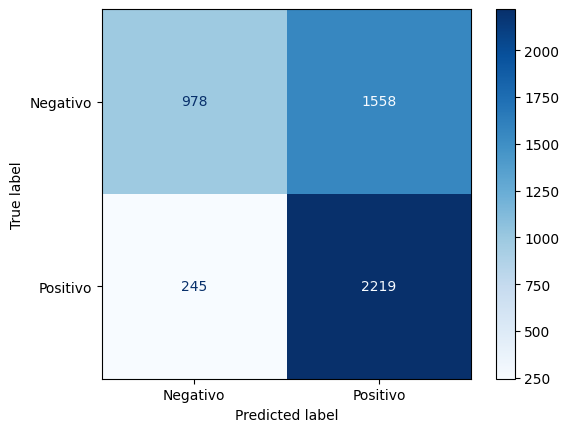

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_true = textblob_data['sentimiento']
y_pred = textblob_data['Etiqueta de sentimiento']

# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
print("Matriz de Confusión:")
print(cm)

# Calcular y mostrar informe de clasificación
report = classification_report(y_true, y_pred)
print("\nInforme de Clasificación:")
print(report)

# Visualizar la matriz de confusión
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Negativo', 'Positivo']).plot(cmap='Blues', values_format='d', xticks_rotation='horizontal')


Utilizamos classification_report para obtener un informe más detallado que incluye precisión, recall y f1-score para cada clase.
La matriz de confusión se imprime antes del informe de clasificación para proporcionar una visión general rápida.
Se ajusta la visualización de la matriz de confusión para incluir etiquetas de clase ('Negativo' y 'Positivo') y mejorar la presentación general.

> * Reporte de clasificación

In [67]:
# Reporte de Clasificación
from sklearn.metrics import classification_report
print(classification_report(textblob_data['sentimiento'], textblob_data['Etiqueta de sentimiento']))

              precision    recall  f1-score   support

           0       0.80      0.39      0.52      2536
           1       0.59      0.90      0.71      2464

    accuracy                           0.64      5000
   macro avg       0.69      0.64      0.62      5000
weighted avg       0.70      0.64      0.61      5000



<a name='NV'></a>

## <p style="background-color:Lime;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> 3. Naive Bayes</p>

> * En este apartado:

1. Cargar el dataset
2. Vectorizar corpus
3. Crear set de entrenamiento y set de prueba
4. Definir algoritmos Naive Bayes
5. Entrenar modelos
6. Crear predicciones
7. Evaluar modelos

### 1. Cargar dataset

In [68]:
# Crearemos una copia del dataset depurado para su trabajo en este apartado
nv_data=df_depurado.copy()

# mostrar dataframe
nv_data.head()

texto sentimiento
0  tip read here 1 copi past notepad word 2 go st...    negative
1  saw 10 yr old bore friend hate cours like movi...    negative
2  could take beauti anim gem like bluth dog go h...    negative
3  say watch dvd first season believ nbc green li...    positive
4  actress film today kristin scott thoma would c...    positive

### 2. Vectorizar corpus

In [71]:
# crearemos una instancia "X" para seleccionar solo los valores del corpus (columna texto)
X = nv_data.iloc[:,0:1].values

# mostrar dimensión de "X"
print("Tenemos 5.000 registros y 1 columna", X.shape)

Tenemos 5.000 registros y 1 columna (5000, 1)


In [72]:
# del modulo sklearn.feature_extraction.text importar la función CountVectorizer
# Convierte una colección de documentos de texto en una matriz de recuentos de tokens.
from sklearn.feature_extraction.text import CountVectorizer

# crear instancia para aplicar función (máximo de características = 1000)
cv  = CountVectorizer(max_features = 2000)

# mediante el objeto "X" aplicaremos la trasformación del corpus
X = cv.fit_transform(nv_data['texto']).toarray()
X[:1]

array([[0, 0, 0, ..., 0, 0, 0]])

In [73]:
nv_data['texto'][1]

'saw 10 yr old bore friend hate cours like movi first time strongli disagre ebert mani year singl thing recommend film willi good alway stori stink unbeliev real stori action interest cinemat sequenc surpris worst child star thoroughli repuls slug guarante turn parent dweebi fat slob kid mean stay away spare child unless want punish excus lousi direct write one hope filmmak suffer accordingli'

In [74]:
# dimensión de X
X.shape

(5000, 2000)

In [75]:
# definir eje y para dividir el set para entrenamiento y prueba
y = nv_data.iloc[:,-1].values
y[:10]

array(['negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'negative', 'positive', 'negative', 'negative'],
      dtype=object)

### 3. Crear set de entrenamiento y set de prueba

In [76]:
from sklearn.model_selection import train_test_split

# dividir el dataframe en set de entrenamiento y set de prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 2000)
(1000, 2000)
(4000,)
(1000,)


### 4. Definir modelos Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

# crear instancia para implementar algortimos Naive Bayes
clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

### 5. Entrenar modelos

In [79]:
# Entrenar modelos
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

BernoulliNB()

### 6. Crear predicciones

In [80]:
# crear predicciones
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

# visualizar resultados de predicción de los modelos
print(y_pred1[:20])
print(y_pred2[:20])
print(y_pred3[:20])

['negative' 'negative' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'positive' 'positive' 'negative' 'negative'
 'negative' 'negative']
['negative' 'negative' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'negative' 'negative' 'positive' 'positive'
 'negative' 'negative' 'positive' 'positive' 'negative' 'negative'
 'negative' 'positive']
['negative' 'negative' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'negative' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'positive']


### 7. Evaluar modelos

In [81]:
# importar función accuracy_score del modulo sklearn.metrics
from sklearn.metrics import accuracy_score

# aplicar métrica de evaluación a los modelos
print('Accuracy score of GaussianNB',accuracy_score(y_test,y_pred1)*100)
print('Accuracy score of MultinomialNB',accuracy_score(y_test,y_pred2)*100)
print('Accuracy score of BernoulliNB',accuracy_score(y_test,y_pred3)*100)

Accuracy score of GaussianNB 71.39999999999999
Accuracy score of MultinomialNB 82.3
Accuracy score of BernoulliNB 82.1


In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# crear y mostrar matriz de confusión
y_true = y_test
y_pred = y_pred1
confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))

# Crear Grafica de la matríz
y_pred = clf1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

[[420  93]
 [193 294]]


In [83]:
# del modulo sklearn.metrics importar la función classification_report
from sklearn.metrics import classification_report

# crear y mostrar el reporte de clasificación
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    negative       0.69      0.82      0.75       513
    positive       0.76      0.60      0.67       487

    accuracy                           0.71      1000
   macro avg       0.72      0.71      0.71      1000
weighted avg       0.72      0.71      0.71      1000



In [84]:
# crear y mostrar matriz de confusión
y_true = y_test
y_pred = y_pred2
confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))

# Crear Grafica de la matríz
y_pred = clf2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

[[430  83]
 [ 94 393]]


In [85]:
# del modulo sklearn.metrics importar la función classification_report
from sklearn.metrics import classification_report

# crear y mostrar el reporte de clasificación
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

    negative       0.82      0.84      0.83       513
    positive       0.83      0.81      0.82       487

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



[[437  76]
 [103 384]]


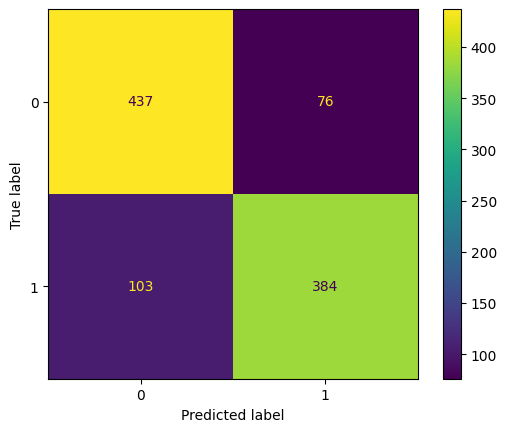

In [86]:
# crear y mostrar matriz de confusión
y_true = y_test
y_pred = y_pred3
confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))

# Crear Grafica de la matríz
y_pred = clf3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [87]:
# del modulo sklearn.metrics importar la función classification_report
from sklearn.metrics import classification_report

# crear y mostrar el reporte de clasificación
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

    negative       0.81      0.85      0.83       513
    positive       0.83      0.79      0.81       487

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



En conclusión es preciso inferir que la elección entre TextBlob y Naive Bayes dependerá de las necesidades específicas del proyecto. Si se busca una solución más robusta y precisa, los modelos Naive Bayes son una opción sólida. No obstante, la simplicidad de TextBlob podría ser valiosa en situaciones donde la interpretabilidad es esencial. La sugerencia de explorar técnicas avanzadas y conjuntos de datos más grandes apunta a un enfoque continuo para mejorar la eficacia del análisis de sentimientos en futuras investigaciones.